# Test differential geometry operations using sphere test case

Try 1-D sphere as first example...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, path, patches
%matplotlib inline

Text(0.3,0.2,'$\\theta$')

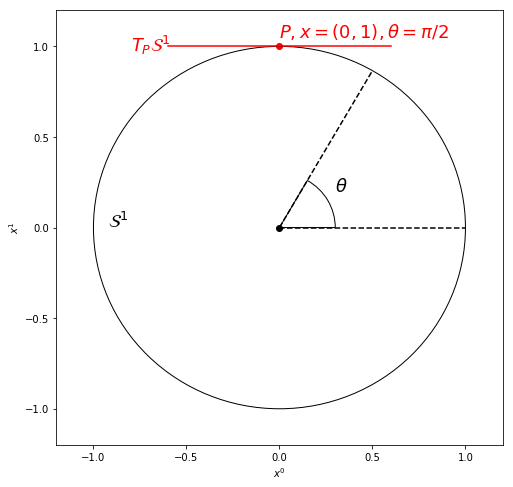

In [4]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.add_line(lines.Line2D([-0.6, 0.6], [1., 1.], color="r", linestyle="-"))
ax.add_line(lines.Line2D([0., 1.], [0., 0.], color="k", linestyle="--"))
ax.add_line(lines.Line2D([0., 0.5], [0., 0.5*np.sqrt(3)], color="k", linestyle="--"))
wedge = patches.Wedge((0., 0), 0.3, 0, 60, fill=False)
ax.add_artist(wedge)
ax.scatter([0.],[0.], color="k")
ax.scatter([0.],[1.], color='r')
ax.annotate(r"$P, x=(0, 1),\theta=\pi/2$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.annotate(r"$T_P\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.8, 0.97), fontsize=18, color='r')
ax.annotate(r"$\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.92, 0.), fontsize=18, color='k')
ax.annotate(r"$\theta$", xy=(0.2, 0.2), xytext=(0.3, 0.2), fontsize=18, color='k')

## Adding vectors in tangent space

In [5]:
def dot(u, v, geometry="spherical"):
    '''
        Calculate dot_product for two n-D vectors, u and v
        Inputs: u, v: two vectors, represented as np.arrays
        Outputs: dot_product, a 1-D real number
    '''
    if geometry == "spherical":
        return u.dot(v)
    elif geometry == "hyperbolic":
        return u[:-1].dot(v[:-1])-u[-1]*v[-1]

In [6]:
def project_to_tangent(point_on_manifold, displacement, geometry="spherical"):
    '''
        Given a displacement, project onto tangent space defined at point_on_manifold
        Inputs: point_on_manifold, an n-D vector in embedding space
                displacement, an n-D vector of the displacement from point_on_manifold
    '''
    xp_norm = dot(point_on_manifold, displacement, geometry)
    xx_norm = dot(point_on_manifold, point_on_manifold, geometry)
    if geometry == "spherical":
        return displacement - (xp_norm/xx_norm)*point_on_manifold

## Tests of dot:
Null vector dotted with unit vector, expect zero

In [7]:
u = np.ones(1)
v = np.zeros(1)
dot(u, v)

0.0

Dot parallel unit vectors, expect one

In [8]:
u = np.ones(1)
v = np.ones(1)
dot(u, v)

1.0

Dot anti-parallel unit vectors, expect negative one

In [9]:
v = -v
dot(u,v)

-1.0

Dot perpendicular vectors, expect zero

In [10]:
u = np.ones(2)
v = np.array([1, -1])
dot(u,v)

0.0

## Tests of project_to_tangent

Add (0,1) to manifold pt (1,0). Expect (0,1), since this is already in tangent space

In [11]:
manifold_pt = np.array([1,0])
displacement = np.array([0,1])
projection = project_to_tangent(manifold_pt, displacement)
print(projection)
np.testing.assert_array_equal(projection, np.array([0., 1.]))

[0. 1.]


Add (1,0) to manifold pt (1,0). Expect (0,0), since this is orthogonal to tangent space

In [12]:
manifold_pt = np.array([1,0])
displacement = np.array([1,0])
projection = project_to_tangent(manifold_pt, displacement)
print(projection)
np.testing.assert_array_equal(projection, np.array([0., 0.]))

[0. 0.]


Add (1,1) to manifold pt (1,0). Expect (0,1), since this it should simply project out the (0,1) component of the displacement.

In [13]:
manifold_pt = np.array([1,0])
displacement = np.array([1,1])
projection = project_to_tangent(manifold_pt, displacement)
print(projection)
np.testing.assert_array_equal(projection, np.array([0., 1.]))

[0. 1.]


Try double projection. Should be equal to single projection.

In [14]:
manifold_pt = np.array([1,0])
displacement = np.array([1,1])
projection = project_to_tangent(manifold_pt, displacement)
projection2 = project_to_tangent(manifold_pt, projection)
print(projection, projection2)
np.testing.assert_array_equal(projection, projection2)

[0. 1.] [0. 1.]


In [15]:
def distance(u, v, geometry="spherical"):
    '''
        Calculate distance between two points in tangent space
        Inputs: u, v: two vectors, represented as np.arrays
        Outputs: dS, a real number
    '''
    if geometry == "spherical":
        return arccos(dot(u,v))

In [18]:
#manifold_pt = np.array([0., 1.])
manifold_pt = np.array([0.5, 0.5*np.sqrt(3)])
displacement = np.array([0.5, 0.5])
tangent_vector = np.array([[0, -1], [1, 0]]).dot(manifold_pt)
displacement_tan = project_to_tangent(manifold_pt, displacement)
print(manifold_pt)
print(tangent_vector)

[0.5       0.8660254]
[-0.8660254  0.5      ]


Text(0,1.05,'$P$')

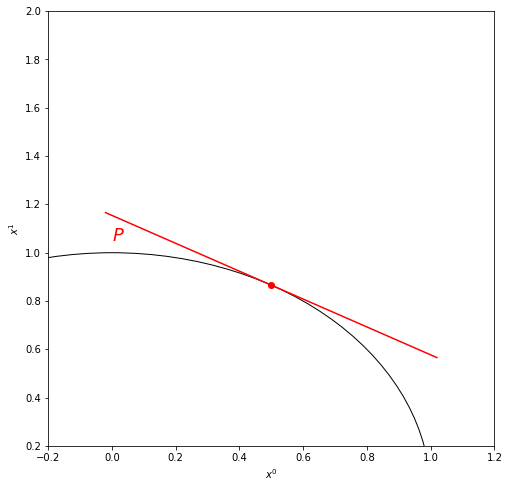

In [19]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.2, 1.2], ylim=[0.2,2.], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
tangent_space_line = [manifold_pt-0.6*tangent_vector, manifold_pt+0.6*tangent_vector]
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle="-"))
ax.scatter(manifold_pt[0], manifold_pt[1], color='r')
ax.annotate(r"$P$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
#ax.scatter(manifold_pt[0]+displacement_tan[0], manifold_pt[1]+displacement_tan[1], color='r')

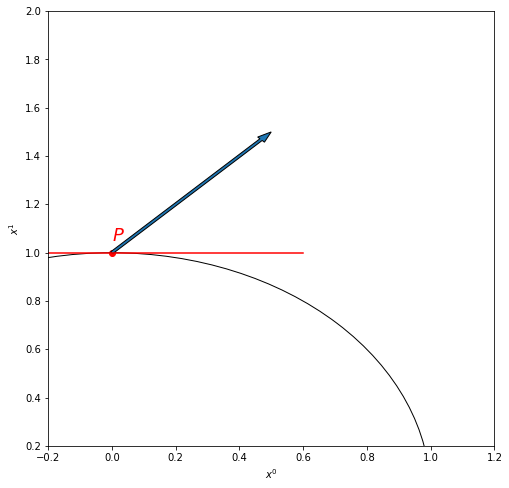

In [110]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.2, 1.2], ylim=[0.2,2.], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
tangent_space_line = [manifold_pt-0.6*tangent_vector, manifold_pt+0.6*tangent_vector]
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle="-"))
ax.scatter(manifold_pt[0], manifold_pt[1], color='r')
ax.annotate(r"$P$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.arrow(manifold_pt[0], manifold_pt[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True)
#ax.scatter(manifold_pt[0]+displacement_tan[0], manifold_pt[1]+displacement_tan[1], color='r')

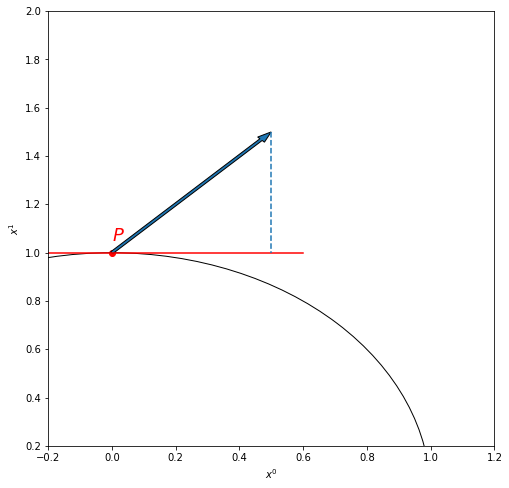

In [111]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.2, 1.2], ylim=[0.2,2.], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
tangent_space_line = [manifold_pt-0.6*tangent_vector, manifold_pt+0.6*tangent_vector]
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle="-"))
ax.scatter(manifold_pt[0], manifold_pt[1], color='r')
ax.annotate(r"$P$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.arrow(manifold_pt[0], manifold_pt[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True)
#ax.scatter(manifold_pt[0]+displacement_tan[0], manifold_pt[1]+displacement_tan[1], color='r')
proj_line = manifold_pt+displacement
ax.add_line(lines.Line2D([(manifold_pt+displacement)[0], 
                          (manifold_pt+displacement_tan)[0]
                         ],
                         [(manifold_pt+displacement)[1], 
                          (manifold_pt+displacement_tan)[1]
                         ], linestyle="--"
                        )
           )
#ax.annotate(r"$T_P\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.8, 0.97), fontsize=18, color='r')
#ax.annotate(r"$\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.92, 0.), fontsize=18, color='k')
#ax.annotate(r"$\theta$", xy=(0.2, 0.2), xytext=(0.3, 0.2), fontsize=18, color='k')

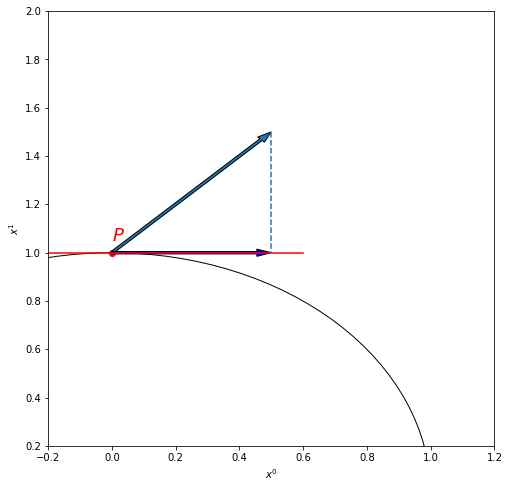

In [112]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.2, 1.2], ylim=[0.2,2.], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
tangent_space_line = [manifold_pt-0.6*tangent_vector, manifold_pt+0.6*tangent_vector]
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle="-"))
ax.scatter(manifold_pt[0], manifold_pt[1], color='r')
ax.annotate(r"$P$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.arrow(manifold_pt[0], manifold_pt[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True)
proj_line = manifold_pt+displacement
ax.add_line(lines.Line2D([(manifold_pt+displacement)[0], 
                          (manifold_pt+displacement_tan)[0]
                         ],
                         [(manifold_pt+displacement)[1], 
                          (manifold_pt+displacement_tan)[1]
                         ], linestyle="--"
                        )
           )
ax.arrow(manifold_pt[0], manifold_pt[1], displacement_tan[0], displacement_tan[1], 
        width=0.01, length_includes_head=True, facecolor='b')


In [113]:
def exponential_map(v_tan, point_on_manifold, geometry="spherical"):
    '''
        Projects vector from tangent space of point_on_manifold onto manifold
        Inputs:
                v_tan is the n-D vector in tangent space, an np.array
                point_on_manifold is the initial n-D point on the manifold, an np.array
    '''
    norm_v_tan = np.sqrt(dot(v_tan, v_tan, geometry))
    if geometry == "spherical":
        return np.cos(norm_v_tan)*point_on_manifold + (np.sin(norm_v_tan)/norm_v_tan)*v_tan

In [131]:
displacement_manifold = exponential_map(displacement_tan, manifold_pt)
theta_manifold = np.arccos(manifold_pt[0])
theta_displacement_manifold = np.arccos(displacement_manifold[0])
print(theta_manifold, theta_displacement_manifold)

1.5707963267948966 1.0707963267948966


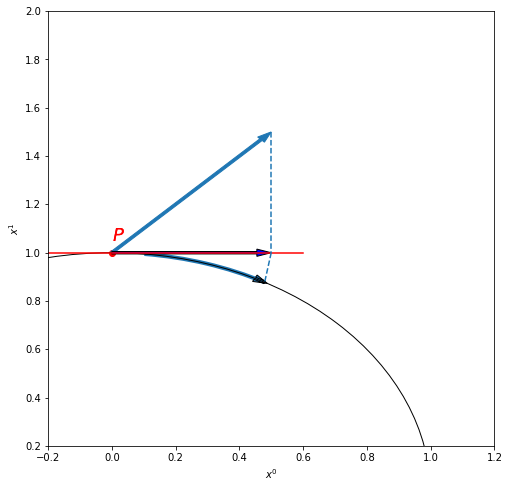

In [165]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.2, 1.2], ylim=[0.2,2.], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
tangent_space_line = [manifold_pt-0.6*tangent_vector, manifold_pt+0.6*tangent_vector]
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle="-"))

ax.scatter(manifold_pt[0], manifold_pt[1], color='r')
ax.annotate(r"$P$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.arrow(manifold_pt[0], manifold_pt[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True, color="tab:blue")
ax.add_line(lines.Line2D([(manifold_pt+displacement)[0], 
                          (manifold_pt+displacement_tan)[0]
                         ],
                         [(manifold_pt+displacement)[1], 
                          (manifold_pt+displacement_tan)[1]
                         ], linestyle="--"
                        )
           )
ax.arrow(manifold_pt[0], manifold_pt[1], displacement_tan[0], displacement_tan[1], 
        width=0.01, length_includes_head=True, facecolor='b')
ax.annotate(r"$P$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
style="Simple,tail_width=0.5,head_width=4,head_length=8"
geodesic = patches.Arc(xy=(0,0),width=2., height=2., angle=0., color="tab:blue", linewidth=4,
                       theta1=theta_displacement_manifold*(180./np.pi), 
                       theta2=theta_manifold*(180./2*np.pi), alpha=1.0
                      )
ax.add_patch(geodesic)
ax.add_line(lines.Line2D([(manifold_pt+displacement_tan)[0], 
                          displacement_manifold[0]
                         ],
                         [ 
                          (manifold_pt+displacement_tan)[1],
                           displacement_manifold[1]
                         ], linestyle="--"
                        )
           )
displaced_tangent_space = np.array([[0, -1], [1, 0]]).dot(displacement_manifold)
ax.arrow(displacement_manifold[0], displacement_manifold[1], 
         -0.01*displaced_tangent_space[0], 
         -0.01*displaced_tangent_space[1], 
        width=0.01, length_includes_head=True, facecolor='tab:blue', alpha=1.0)
#ax.add_patch(geodesic_arrow)
#wedge = pat.arc((0,0), )
#ax.add_artist(wedge)


#ax.annotate(r"$T_P\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.8, 0.97), fontsize=18, color='r')
#ax.annotate(r"$\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.92, 0.), fontsize=18, color='k')
#ax.annotate(r"$\theta$", xy=(0.2, 0.2), xytext=(0.3, 0.2), fontsize=18, color='k')

In [174]:
plt.style.library.keys()

dict_keys(['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep'])

In [175]:
plt.style.use("dark_background")

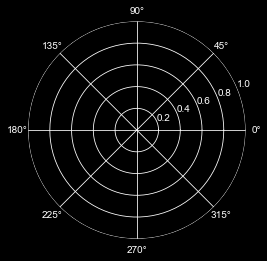

In [176]:
ax2 = plt.subplot(111, projection="polar")
ax.grid(True)

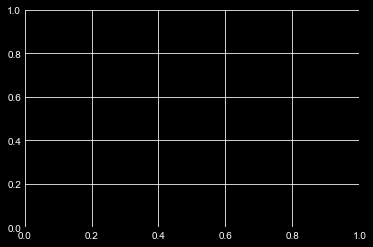

In [177]:
ax = plt.subplot(111)
ax.grid(True)